# Introduction to Data Science - Homework 5
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 16, 11:59pm.

In this homework you will use linear regression to study house prices in Salt Lake City. 

## Your Data
Fill out the following information: 

*First Name:*   Brooke <br>
*Last Name:*   Stanislawski <br>
*E-mail:*   brooke.stanislawski@utah.edu <br>
*UID:*  u1142223 <br>


## Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 (SLC avenues neighborhod [Google Map](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (property size, house size, number of bedrooms, etc...). 


### Task 1: Import the data 
Use the pandas.read_csv() function to import the dataset. The data is contained in two files: 'train1.csv' and 'train2.csv'. After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
# your code goes here
data1 = pd.read_csv('train1.csv')
data2 = pd.read_csv('train2.csv')
data = pd.concat([data1,data2],axis=0)#top/bottom
data.head()

,ListNo,Access,AdditInfo,Acres,ListAgt,AirType,Amenities,Area,BackDim,Basemnt,...,WinEvp1,WinEvp2,WinEvp3,WinEvp4,Window,WithDrDt,YearBlt,Zip,Zoning,LastMod
0,1397571,Concrete,NaN,0.29,Liz Slager,Central Air; Electric,See Remarks; Cable Tv Available; Cable Tv Wire...,101,0.0,Daylight; Entrance; Full; Walkout,...,0,0,0,0,Blinds,00/00/0000,1998,84103,NaN,08/29/2016
1,1394021,Asphalt,NaN,0.01,Angela Carlson,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1965,84103,RES,08/22/2016
2,1393604,NaN,NaN,0.11,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1940,84103,NaN,08/29/2016
3,1393602,Concrete,NaN,0.14,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds,00/00/0000,1940,84103,NaN,08/29/2016
4,1393829,Asphalt,NaN,0.01,T. Carter Maudsley,Central Air; Electric,Cable Tv Wired,101,0.0,None/Crawl Space,...,0,0,0,0,NaN,00/00/0000,1969,84103,NaN,08/18/2016


In [3]:
print('data1 shape: ' + str(data1.shape))
print('data2 shape: ' + str(data2.shape))
print('data shape: ' + str(data.shape))

data1 shape: (200, 206)
data2 shape: (148, 206)
data shape: (348, 206)


### Task 2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

+ Only keep houses with List Price between 200,000 and 1,000,000 dollars. This is an arbitrary choice and we realize that some of you are high rollers, but for our purposes we'll consider the others as outliers. 

+ Remove columns that you don't think contribute to the value of the house. This is a personal decision - what attributes of a house are important to you? You should at least keep the following variables since the questions below will use them: ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'] 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [str.replace()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as in Lecture 11. In particular, convert 'TotSqf' to an integer and add a column titled Prop_Type_num that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
0 & \text{if $i$-th listing is a condo or townhouse} \\
1 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (two have unreasonably large values).

In [4]:
# your code goes here

# Task 2.2
truncdata = data[(data["LstPrice"] >= 200000) & (data["LstPrice"] <= 1000000)]
print("Shape after Task 2.2: ",truncdata.shape)

# Task 2.3
housedata=truncdata.drop(['AdditInfo','Area','BackDim','City','ListCoAgt','CompBac','CompDays','CompSac','ContPh1','ContPh2','Contact','County','EntrdBy','HouseNbr','NumDish','NumRefg','OpenHseDt','PublicID','RMPriceLow','ReinstDt','Remarks','SchDist','SlAgentPub','StatCode','State','StrType','SubAgncy','TimeClause','TotWinEvp','UndrCnst','UnitNbr','Water','WinEle1','WinEle2','WinEle3','WinEle4','WinEvp1','WinEvp2','WinEvp3','WinEvp4','WithDrDt'], axis=1)
housedata=housedata.drop(['ListAgt','AirType','Amenities','Basemnt','Window','Access','DirPre','Zoning','P2Bed',
 'P2BthFull',
 'P2BthHalf',
 'P2BthTq',
 'P2Fire',
 'P2Rent',
 'P2Sqf',
 'P2FamDen',
 'P2Kitch',
 'P2Bar',
 'P2Formal',
 'P2SemiForm',
 'P2Laundry',
 'P3Bed',
 'P3BthFull',
 'P3BthHalf',
 'P3BthTq',
 'P3Fire',
 'P3Rent',
 'P3Sqf',
 'P3FamDen',
 'P3Kitch',
 'P3Bar',
 'P3Formal',
 'P3SemiForm',
 'P3Laundry',
 'P4Bed',
 'P4BthFull',
 'P4BthHalf',
 'P4BthTq',
 'P4Fire',
 'P4Rent',
 'P4Sqf',
 'P4FamDen',
 'P4Kitch',
 'P4Bar',
 'P4Formal',
 'P4SemiForm',
 'P4Laundry',
 'P5Bed',
 'P5BthFull',
 'P5BthHalf',
 'P5BthTq',
 'P5Fire',
 'P5Rent',
 'P5Sqf',
 'P5FamDen',
 'P5Kitch',
 'P5Bar',
 'P5Formal',
 'P5SemiForm',
 'DirPost',
 'SldOfcID',
 'SlrPaidCns',
 'NumDispose',
 'NumOvRng',
 'Owner',
 'TaxID',
 'Sewer',
 'Show',
 'P5Laundry',], axis=1) #removing categorical variables with too many unique options to regress
print("Shape after Task 2.3: ", housedata.shape)

# Task 2.4
housedata['TotSqf'] = housedata['TotSqf'].astype(str).str.replace(",","").astype(int)
housedata["Prop_Type_num"] = housedata["PropType"].map({'Condo':0, 'Townhouse':0, 'Single Family':1}) #convert categorical var to numbers
housedata["SchSenior_num"] = housedata["SchSenior"].map({'West':0, 'East':0}) #convert categorical var to numbers
print("Shape after Task 2.4: ", housedata.shape)

# Task 2.5
housedata = housedata[housedata['Longitude'] != 0] #mask to get ride of Longitude = 0 row
housedata = housedata[housedata['Taxes'] < 95000]
print("Shape after Task 2.5: ", housedata.shape) #should remove 3 rows

#further reduce data to only minimum necessary vars for speed of generating plots in following exercises
hdf = housedata[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt','Prop_Type_num']]
print('hdf working data shape: ', hdf.shape) #should remove 3 rows

Shape after Task 2.2:  (263, 206)
Shape after Task 2.3:  (263, 96)
Shape after Task 2.4:  (263, 98)
Shape after Task 2.5:  (260, 98)
hdf working data shape:  (260, 16)


### Task 3: Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable. 

+ Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see vmin and vmax parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
    - Show a legend
    - Make sure the proper labels are visible and readable (see [xticks](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [yticks](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. For the plot, only use a subset of the columns: ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']. Determine which columns have strong correlations. 

+ Describing your findings. 


In [5]:
# your code goes here
print('Data shape: ', hdf.shape, '\n')
print(hdf.head())
print(hdf.tail(), '\n')
print('Data types:\n',hdf.dtypes)

Data shape:  (260, 16) 

   Acres  Deck  GaragCap   Latitude   Longitude  LstPrice  Patio  PkgSpacs  \
0   0.29     1         3  40.779524 -111.893542    725000      1         0   
1   0.01     0         0  40.773243 -111.883291    205000      0         0   
2   0.11     0         0  40.773972 -111.867470    390000      1         0   
3   0.14     0         1  40.783009 -111.872100    445000      1         3   
5   0.01     0         2  40.771693 -111.886951    339000      0         2   

        PropType  SoldPrice  Taxes  TotBed  TotBth  TotSqf  YearBlt  \
0  Single Family     752000   7244     4.0     5.0    5415     1998   
1          Condo     205000   1431     2.0     1.0     924     1965   
2  Single Family     390000   1816     3.0     1.0    1702     1940   
3  Single Family     443000   3260     3.0     2.0    1756     1940   
5          Condo     334000   2141     3.0     2.0    1368     1976   

   Prop_Type_num  
0              1  
1              0  
2              1  
3  

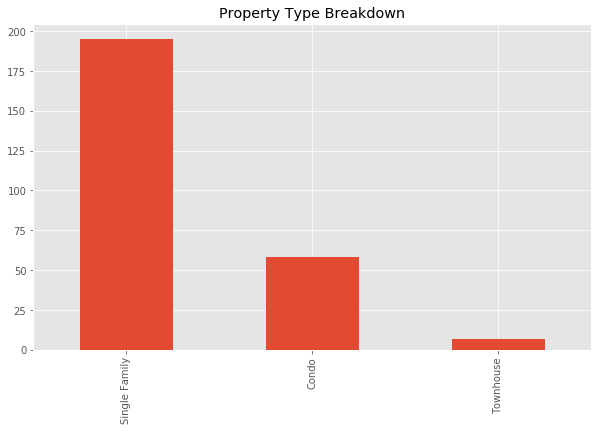

In [6]:
# bar chart of property type
hdf["PropType"].value_counts().plot(kind='bar',title="Property Type Breakdown")

                  Acres      Deck  GaragCap  Latitude  Longitude  LstPrice  \
Acres          1.000000  0.166535  0.452265  0.565715   0.242940  0.718336   
Deck           0.166535  1.000000  0.080732  0.188524   0.016205  0.161625   
GaragCap       0.452265  0.080732  1.000000  0.321907   0.084631  0.635873   
Latitude       0.565715  0.188524  0.321907  1.000000  -0.252189  0.362788   
Longitude      0.242940  0.016205  0.084631 -0.252189   1.000000  0.388738   
LstPrice       0.718336  0.161625  0.635873  0.362788   0.388738  1.000000   
Patio          0.007261  0.751281 -0.046058 -0.027318   0.049541 -0.012415   
PkgSpacs       0.176664  0.030615 -0.024399  0.171773   0.038139  0.157512   
SoldPrice      0.711958  0.158344  0.626637  0.366947   0.390691  0.995096   
Taxes          0.680737  0.115316  0.629935  0.334774   0.358819  0.882305   
TotBed         0.594395  0.116709  0.358216  0.289318   0.329295  0.661516   
TotBth         0.508805  0.105799  0.599209  0.295843   0.151271

Text(0.5,1,'Heat Map of Coefficients')

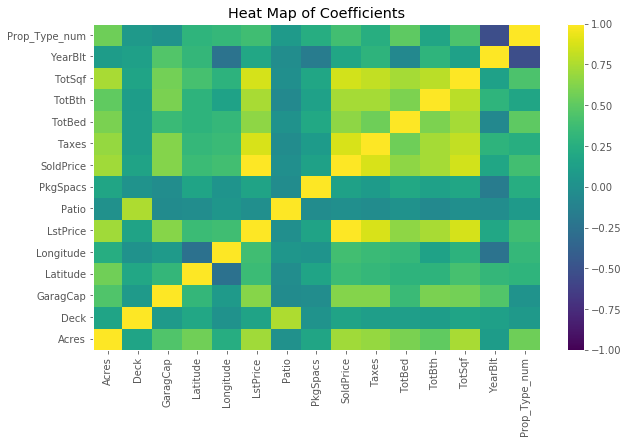

In [7]:
# calculate and visualize correlations as matrix
hdf_corr = hdf.corr()
print(hdf_corr)

ind = np.arange(len(list(hdf_corr))) + 0.5
labels = list(hdf_corr)[1:]
plt.pcolor(hdf_corr,vmin=-1,vmax=1)
plt.xticks(ind,list(hdf_corr),rotation=90)
plt.yticks(ind,list(hdf_corr))
plt.colorbar()
plt.title('Heat Map of Coefficients')


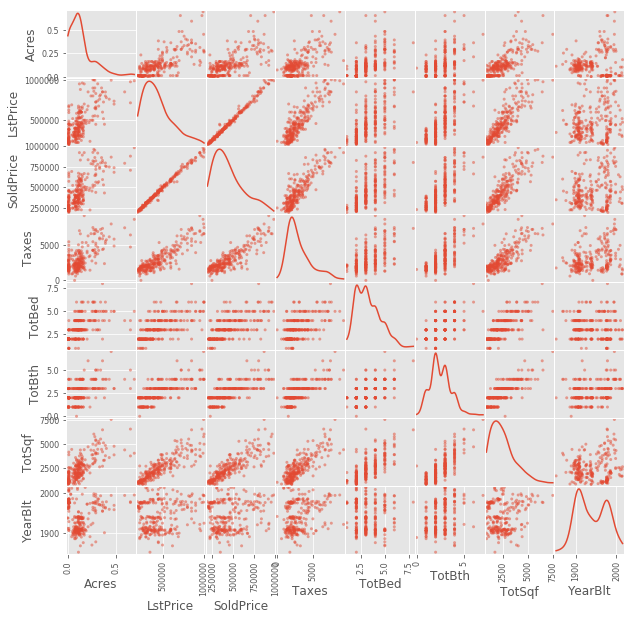

In [8]:
# scatter plot matrix 

subset = hdf[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

pd.plotting.scatter_matrix(subset, figsize=(10, 10), diagonal='kde')
plt.show()

**Your Interpretation:** <br><br> Description of Data (Task 3.1): <br> After cleaning the data, we are left with 260 house listings and 98 columns (meaning 98 variables).  In order to reduce speed of generating plots and analyzing correlations, I further reduced the data to the minimum of 16 variables and therefore the dataframe shape consisted of 260 house listings and 16 variables.  Most of the variables contain numerical values of the datatypes 'int' or 'float' and two of the categorical values have been converted to numerical in the last two columns title "Prop_Type_num" and "SchSenior_num."  Upon review of the 'head' and 'tail' of the data, the values look reasonable.  It is interested that a large majority of the houses sold were Single Family and so few of them were Townhouses. <br> <br> Findings: <br> Examining the heat map of the coefficients, it is clear which correlations appear strongest with regards to Sold Price: List Price, Taxes, and then TotSqf, TotBed, TotBth, and Acres to some extent.  Patio and Sold Price appear to have a weak correlation in comparison.  These conclusions are verified by the numerical values of the coefficients in the table above.  Based on the scatter plot matrix from Task 3.4, the strongest correlations appear between the Sold Price and List Price.  Also strong, but not as strong, are the correlations between these two variables and Taxes.  In this same realm of strength is the correlation between Total Square Ft and List Price, Sold Price, and Taxes.

### Task 4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

Bonus: If you can, overlay the scatterplot on a map of the city. (This is challenging, and we didn't teach you how to do it, so you might do the other parts of the assignment first.)

What can you say about the relation between the location and the house price?

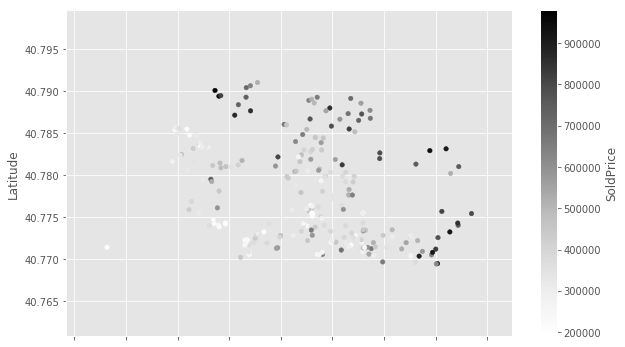

In [9]:
# your code goes here
hdf.plot.scatter(x="Longitude", y="Latitude", c="SoldPrice")

**Your Interpretation:** Based on the pricing scale of the dots on the geospatial plot, it is clear that as one travels north or east, the housing prices increase.  The further southwest you go in the Avenues neighborhood, the less expensive the houses are.  The most expensive houses apper in the northwest corner and in the southeast corner (near the University).

### Task 5: Simple  Linear Regression 
Use the 'ols' function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sold price on some of the other variables. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (SoldPrice ~ LstPrice) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a plot of list price vs. sold price and overlay the prediction coming from your regression model. 

In [10]:
# Your code here

sp_tsf = sm.ols(formula="SoldPrice ~ TotSqf", data=hdf).fit()
sp_tsf.summary()

sp_tb = sm.ols(formula="SoldPrice ~ TotBed", data=hdf).fit()
sp_tb.summary()

sp_yb = sm.ols(formula="SoldPrice ~ YearBlt", data=hdf).fit()
sp_yb.summary()

sp_ls = sm.ols(formula="SoldPrice ~ LstPrice", data=hdf).fit()
sp_ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          2.97e-261
Time:                        17:04:20   Log-Likelihood:                -2927.2
No. Observations:                 260   AIC:                             5858.
Df Residuals:                     258   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.317e+04   2948.953      4.465      0.000    7361.378     1.9e+04
LstPrice       0.9441      0.006    161.593      0.000       0.933       0.956
==============================================================================
Omnibus:                      123.259   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.446
Skew:                          -1.750   Prob(JB):                    3.95e-192
Kurtosis:                      11.313   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

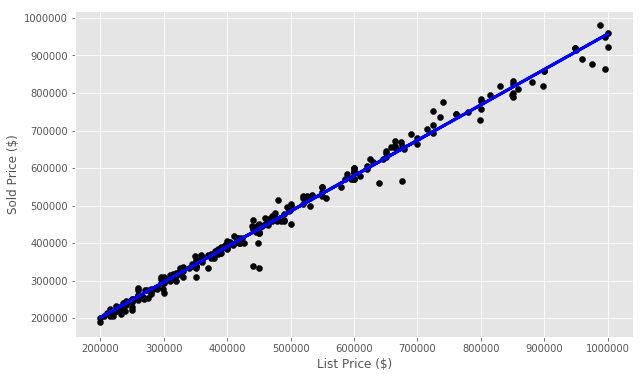

In [11]:
# plot 
plt.scatter(x=hdf['LstPrice'],y=hdf['SoldPrice'],c='k')
plt.plot(hdf['LstPrice'],sp_ls.predict(),'k',color='blue',linewidth=3)

plt.xlabel('List Price ($)')
plt.ylabel('Sold Price ($)')
plt.show()

**Your Interpretation:** The R-squared value for the linear regression relating Sold Price to List Price is 0.99 which is very high.  This value means that the regression model captures 99% of the variance of the data.  The coefficient $\beta_1$ = 0.9441, which implies that for every dollar increase in List Price, the Sold Price will increase by $0.94.


### Task 6: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables. Which variables are the best predictors for the Sold Price? 

Specific questions:
1. Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.  
+ Estimate the value that each Garage space adds to a house. 
+ Does latitude or longitude have an impact on house price? Explain. 
+ If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

In [12]:
# your code goes here

#Variables: Acres, Deck, GaragCap, Latitude, Longitude, Patio, PkgSpacs, Taxes, TotBed, TotBth, TotSqf, YearBlt

sp_all_ols = sm.ols(formula="SoldPrice ~ Acres + Deck + GaragCap + Latitude + Longitude + Patio + PkgSpacs + TotBed + TotBth + TotSqf + YearBlt", data=hdf).fit()
# Parking Spaces, Patio, Deck, TotBed, and YearBlt have high p-values so got rid of them

sp_all_ols = sm.ols(formula="SoldPrice ~ Acres + GaragCap + Latitude + Longitude + TotBth + TotSqf", data=hdf).fit()
#Latitude and TotBth have high p-values so getting rid of them

sp_all_ols = sm.ols(formula="SoldPrice ~ Acres + GaragCap + Longitude + TotSqf", data=hdf).fit()
# R-squared value decreased only very slightly

sp_all_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     260.3
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           9.45e-89
Time:                        17:04:20   Log-Likelihood:                -3317.4
No. Observations:                 260   AIC:                             6645.
Df Residuals:                     255   BIC:                             6663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.58e+08   4.44e+07      5.815      0.000    1.71e+08    3.45e+08
Acres       2.169e+05   6.37e+04      3.406      0.001    9.15e+04    3.42e+05
GaragCap    4.165e+04   6661.217      6.253      0.000    2.85e+04    5.48e+04
Longitude   2.305e+06   3.97e+05      5.812      0.000    1.52e+06    3.09e+06
TotSqf        90.8848      7.147     12.717      0.000      76.810     104.959
==============================================================================
Omnibus:                       29.795   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.568
Skew:                           0.556   Prob(JB):                     3.51e-15
Kurtosis:                       5.215   Cond. No.                     2.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

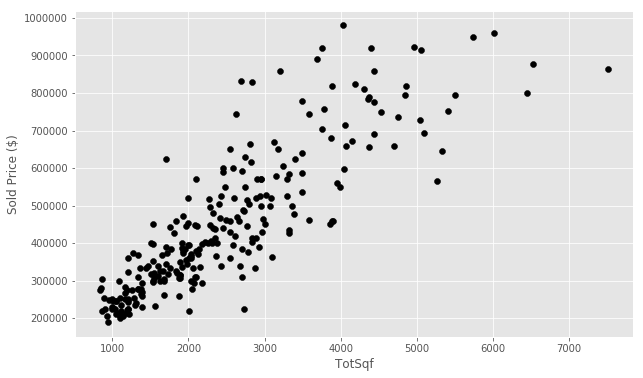

In [13]:
# plot for my own reference
plt.scatter(x=hdf['TotSqf'],y=hdf['SoldPrice'],c='k')
#plt.plot(hdf['TotSqf'],sp_all_ols.predict(),'k',color='blue',linewidth=3)

plt.xlabel( 'TotSqf')
plt.ylabel('Sold Price ($)')
plt.show()

**Your Interpretation:** Based on experimentation with the mulitlinear regression models, the best predictors for Sold Price are Acres, GaragCap, Longitude, and TotSqf. 

Question 1: Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.

The coefficient for TotSqf, 90.88, represents how much the Sold Price increases on average for every unit (sqft) increase in TotSqf.  This does not represent the price per square foot because the Sold Price will only increase $90.88 for every square foot added above the y-intercept within this data range.

Question 2: Estimate the value that each Garage space adds to a house. 

Based on the coefficient for the garage spaces, it is concluded that, on average, each unit of garage space can add $41,650 to the Sold Price of the house.

Question 3: Does latitude or longitude have an impact on house price? Explain. 

Based on the experimentation of regression with different variables, it was seen that the correlation between Latitude and Sold Price was weak in that it had a high p-value so it was removed from the model.  Longitude, however, has a very good p-value, which is validated by the geospatial plot that shows the more expensive houses in the east.  For every unit increase in longitude, the Sold Price increases by $2,305,000, keeping in mind that the increases in longitude within one neighborhood are miniscule.

Question 4: If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

The r-squared value of this model is 0.803 meaning that this model only accounts for 80% of the variance of the data.  This model does not predict Sold Price better than the simple regression using only list price.

### Task 7: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$
From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation. 

In [14]:
# Your code goes here

sp_ptn = sm.ols(formula="SoldPrice ~ Prop_Type_num", data=hdf).fit()
sp_ptn.summary()
# r-squared is low, but p-val is very good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     47.67
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           3.90e-11
Time:                        17:04:20   Log-Likelihood:                -3506.7
No. Observations:                 260   AIC:                             7017.
Df Residuals:                     258   BIC:                             7025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.21e+05   2.17e+04     14.790      0.000    2.78e+05    3.64e+05
Prop_Type_num   1.73e+05   2.51e+04      6.904      0.000    1.24e+05    2.22e+05
==============================================================================
Omnibus:                       23.215   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.712
Skew:                           0.799   Prob(JB):                     9.60e-07
Kurtosis:                       2.922   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
sp_ptn_tsf = sm.ols(formula="SoldPrice ~ Prop_Type_num + TotSqf", data=hdf).fit()
sp_ptn_tsf.summary()

# r-squared is better, but p-val of Prop type is terrible

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     367.2
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           4.55e-76
Time:                        17:04:21   Log-Likelihood:                -3353.2
No. Observations:                 260   AIC:                             6712.
Df Residuals:                     257   BIC:                             6723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.147e+05   1.48e+04      7.755      0.000    8.55e+04    1.44e+05
Prop_Type_num  1.242e+04   1.54e+04      0.805      0.422    -1.8e+04    4.28e+04
TotSqf          131.9001      5.478     24.079      0.000     121.113     142.687
==============================================================================
Omnibus:                       37.538   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.262
Skew:                           0.774   Prob(JB):                     9.12e-16
Kurtosis:                       5.000   Cond. No.                     8.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

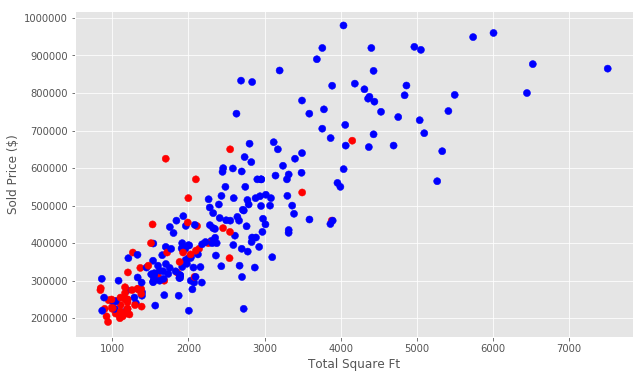

In [16]:
# scatter plot
prop_type = hdf["Prop_Type_num"].tolist()
Prop_color = [[1,0,0] if x == 0 else [0,0,1] for x in prop_type]
# red = [1,0,0] = townhouse or condo
# blue = single family
hdf.plot.scatter(x="TotSqf", y="SoldPrice", s=50, c=Prop_color)

plt.legend()
plt.xlabel('Total Square Ft')
plt.ylabel('Sold Price ($)')
plt.show()

**Your Interpretation:** From the scatter plot, we see that the confounder here is Property Type because houses of the Property Type "Condo" or "Townhouse" also tend to be smaller in total square feet.  Therefore, we can get rid of Property Type from our model and use TotSqf as the predictor.